<a href="https://colab.research.google.com/github/LohitSubodh/Deep-Learning-for-physical-systems-ME504/blob/main/NN_Assign3_2017meb1219.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ME504-Assign 3
### Submitted by Lohit Subodh
### 2017meb1219

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import tensorflow as tf
%matplotlib inline
from sklearn.model_selection import train_test_split

# (1)Implementation of Neural Network from the scratch

In [ ]:
# generating data 
x_data = np.array([])
while True: 
    x_data = np.append(x_data, random.uniform(0,7))
    if len(x_data) >= 100: 
      break
y_data = np.sin(0.79*x_data)

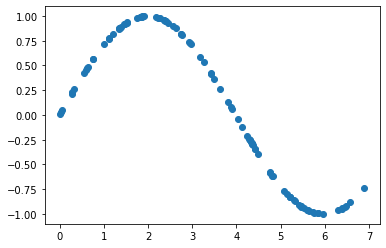

In [ ]:
# plotting y vs x
plt.scatter(x_data,y_data)
plt.show()

In [ ]:
# adding noise
x_noise = np.array([])
y_noise = np.array([])
for i in range(10):
    a = random.uniform(0,7)
    x_noise = np.append(x_noise,a )
    y_noise = np.append(y_noise, random.uniform(-1,1))


x_data_n = np.concatenate((x_data,x_noise))
y_data_n = np.concatenate((y_data,y_noise))

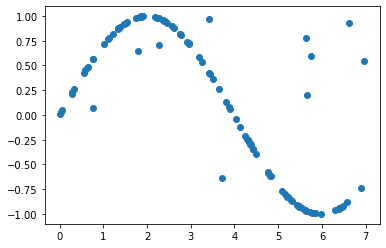

In [ ]:
plt.scatter(x_data_n,y_data_n)
plt.show()

In [ ]:
x_data_n=x_data_n.reshape(110,1)

In [ ]:
x_data_n.shape

(110, 1)

In [ ]:
y_data_n.shape

(110,)

In [ ]:
# tanh activation function
def tanh_activation(z,derivative=False):
  if derivative:
    return  (1 - tanh_activation(z)**2)
  else:
    return  (np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))

In [ ]:
# relu activation function
def relu_activation(z,derivative=False):
  if derivative:
    return np.where(z >= 0, 1, 0)
  else:
    return np.maximum(0,z)

In [ ]:
# leaky relu activation function
def leakyrelu_activation(z,derivative=False):
  if derivative:
    dx = np.ones_like(z)
    dx[z < 0] = 0.01
    return dx
  else:
    return np.where(z > 0, z, z * 0.01)     

In [ ]:
# sigmoid activation function
def sig_activation(z, derivative=False):
  if derivative:
    return sig_activation(z) * (1 - sig_activation(z))
  else:
    return 1 / (1 + np.exp(-z))
      

In [ ]:
nnodes_hidden=int(input("Enter number of nodes for each hidden layer:"))

Enter number of nodes for each hidden layer:20


In [ ]:
n_hidden=int(input("Enter number of hidden layers:"))

Enter number of hidden layers:2


In [ ]:
nn_list=[nnodes_hidden]*n_hidden

In [ ]:
# this list is passed as argument for our model.
# user can choose any number of nodes and number of hidden layers
print(nn_list)

[20, 20]


In [ ]:
# adding input and output layer to nn_list
nn_list.insert(0,1)
nn_list.append(1)

In [ ]:
# this is the final list
print(nn_list)

[1, 20, 20, 1]


In [ ]:
# creating dictionary for activation functions
activation_dict={1 : "sigmoid ",
                 2: " tanh ",
                 3: " relu ",
                 4: "leaky relu"}
print(activation_dict)                

{1: 'sigmoid ', 2: ' tanh ', 3: ' relu ', 4: 'leaky relu'}


In [ ]:
activation_type=int(input("Enter a number for activation:"))

Enter a number for activation:2


In [ ]:
activation_dict[activation_type]

' tanh '

In [ ]:
# initialization of parameters
def initialize_params(layer_sizes):
    params = {}
    for i in range(1, len(layer_sizes)):
        params['W' + str(i)] = np.random.uniform(0,1,(layer_sizes[i], layer_sizes[i-1]))
        params['B' + str(i)] = np.zeros([layer_sizes[i],1])
    return params



In [ ]:
# forward propagation 
def forward_propagation(X_train, params,act_no):
    layers = len(params)//2
    values = {}
    for i in range(1, layers+1):
        if i==1:
            values['Z' + str(i)] = np.dot(params['W' + str(i)], X_train) + params['B' + str(i)]
            if act_no == 1:
              values['A' + str(i)] = sig_activation(values['Z' + str(i)])
            elif act_no == 2:
              values['A' + str(i)] = tanh_activation(values['Z' + str(i)])
            elif act_no ==3 :
              values['A' + str(i)] = relu_activation(values['Z' + str(i)])    
            else :
              values['A' + str(i)] = leakyrelu_activation(values['Z' + str(i)])
        else:
            values['Z' + str(i)] = np.dot(params['W' + str(i)], values['A' + str(i-1)]) + params['B' + str(i)]
            if i==layers:
                values['A' + str(i)] = values['Z' + str(i)]
            else:
                if act_no == 1:
                  values['A' + str(i)] = sig_activation(values['Z' + str(i)])
                elif act_no == 2:
                  values['A' + str(i)] = tanh_activation(values['Z' + str(i)])
                elif act_no ==3 :
                  values['A' + str(i)] = relu_activation(values['Z' + str(i)])    
                else :
                  values['A' + str(i)] = leakyrelu_activation(values['Z' + str(i)])
                
    return values

In [ ]:
# cost function
def compute_cost(values, Y_train):
    layers = len(values)//2
    Y_pred = values['A' + str(layers)]
    cost = 1/(2*len(Y_train)) * np.sum(np.square(Y_pred - Y_train))
    return cost

In [ ]:
# back propagation function
def backward_propagation(params, values, X_train, Y_train,act_no):
    layers = len(params)//2
    m = len(Y_train)
    grads = {}
    for i in range(layers,0,-1):
        if i==layers:
            dA = 1/m * (values['A' + str(i)] - Y_train)
            dZ = dA
        else:
            dA = np.dot(params['W' + str(i+1)].T, dZ)
            if act_no == 1:
              dZ = np.multiply(dA, sig_activation(values['A' + str(i)],derivative=True))
            elif act_no ==2 :
              dZ = np.multiply(dA, tanh_activation(values['A' + str(i)],derivative=True))
            elif act_no ==3:
              dZ = np.multiply(dA, relu_activation(values['A' + str(i)],derivative=True))
            else :
              dZ = np.multiply(dA, leakyrelu_activation(values['A' + str(i)],derivative=True))  
              
        if i==1:
            grads['W' + str(i)] = 1/m * np.dot(dZ, X_train.T)
            grads['B' + str(i)] = 1/m * np.sum(dZ, axis=1, keepdims=True)
        else:
            grads['W' + str(i)] = 1/m * np.dot(dZ,values['A' + str(i-1)].T)
            grads['B' + str(i)] = 1/m * np.sum(dZ, axis=1, keepdims=True)
    return grads

In [ ]:
# updating the parameters
def update_params(params, grads, learning_rate):
    layers = len(params)//2
    params_updated = {}
    for i in range(1,layers+1):
        params_updated['W' + str(i)] = params['W' + str(i)] - learning_rate * grads['W' + str(i)]
        params_updated['B' + str(i)] = params['B' + str(i)] - learning_rate * grads['B' + str(i)]
    return params_updated

In [ ]:
# our model
def model(X_train, Y_train, layer_sizes, num_iters, learning_rate,act_no):
    params = initialize_params(layer_sizes)
    err_list=[]
    for i in range(num_iters):
        values = forward_propagation(X_train.T, params,act_no)
        cost = compute_cost(values, Y_train.T)
        grads = backward_propagation(params, values,X_train.T, Y_train.T,act_no)
        params = update_params(params, grads, learning_rate)
        err_list.append(cost)
        print('Cost at iteration ' + str(i+1) + ' = ' + str(cost) + '\n')
    return params,err_list

In [ ]:
# calculating mean square error
from sklearn.metrics import mean_squared_error

def compute_accuracy(X_train, X_test, Y_train, Y_test,layer_sizes, params,act_no):
    values_train = forward_propagation(X_train.T, params,act_no)
    values_test = forward_propagation(X_test.T, params,act_no)
    train_acc = mean_squared_error(Y_train, values_train['A' + str(len(layer_sizes)-1)].T)
    test_acc = mean_squared_error(Y_test, values_test['A' + str(len(layer_sizes)-1)].T)
    return train_acc, test_acc

In [ ]:
# predicting new values
def predict(X, params,act_no):
    values = forward_propagation(X.T, params,act_no)
    predictions = values['A' + str(len(values)//2)].T
    return predictions

### Using tanh activation function

In [ ]:

# testing our model with noise
X,Y=x_data_n,y_data_n                                                
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.2)           #split data into train and test sets in 80-20 ratio
num_iters = 2000                                                                  
learning_rate = 0.03                                                              
params,err_list = model(X_train, Y_train,nn_list, num_iters, learning_rate,activation_type)           #train the model



Cost at iteration 1 = 52.49014741883407

Cost at iteration 2 = 51.699858309439755

Cost at iteration 3 = 50.92374607692496

Cost at iteration 4 = 50.16082679433496

Cost at iteration 5 = 49.40996571498012

Cost at iteration 6 = 48.6698041175461

Cost at iteration 7 = 47.938744709051086

Cost at iteration 8 = 47.21502651233415

Cost at iteration 9 = 46.496808839365215

Cost at iteration 10 = 45.78220024791278

Cost at iteration 11 = 45.06922742953842

Cost at iteration 12 = 44.35580612699569

Cost at iteration 13 = 43.63975835714408

Cost at iteration 14 = 42.91883845507308

Cost at iteration 15 = 42.19076072956027

Cost at iteration 16 = 41.45329069457534

Cost at iteration 17 = 40.704322405683186

Cost at iteration 18 = 39.94172710328304

Cost at iteration 19 = 39.1629689847791

Cost at iteration 20 = 38.36466535910299

Cost at iteration 21 = 37.542063585150004

Cost at iteration 22 = 36.68825994694494

Cost at iteration 23 = 35.79310685477368

Cost at iteration 24 = 34.84191557129641

In [ ]:
train_acc, test_acc = compute_accuracy(X_train, X_test, Y_train, Y_test,nn_list, params,activation_type) 
print('Root Mean Squared Error on Training Data = ' + str(train_acc))
print('Root Mean Squared Error on Test Data = ' + str(test_acc))

Root Mean Squared Error on Training Data = 0.16888959351784893
Root Mean Squared Error on Test Data = 0.06230648037443726


In [ ]:
y_pred=predict(x_data_n,params,activation_type)

In [ ]:
type(params)

dict

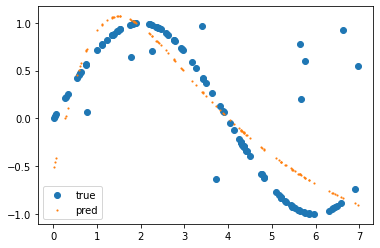

In [ ]:
# plotting true and predicted values on test test for tanh activation with noisy input
plt.scatter(x_data_n,y_data_n,label='true')
plt.scatter(x_data_n,y_pred,s=1.25,label='pred')
plt.legend(loc='best')

In [ ]:
y_pred_train=predict(X_train,params,activation_type)

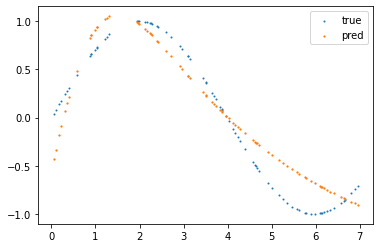

In [ ]:
# plotting for training values with tanh activation
plt.scatter(X_train,Y_train,s=1,label='true')
plt.scatter(X_train,y_pred_train,s=1.5,label='pred')
plt.legend(loc='best')

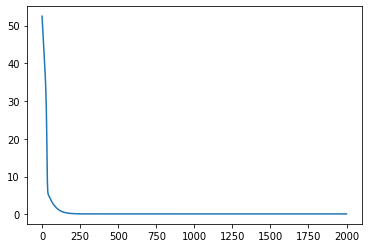

In [ ]:
# plotting error with number of iterations for tanh
plt.plot(err_list)

### Testing our model without noise for tanh activation function

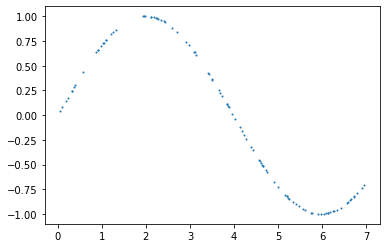

In [ ]:
# generating data without noise
x_data_2 = np.array([])
while True: 
    x_data_2 = np.append(x_data_2, random.uniform(0,7))
    if len(x_data_2) >= 100: 
      break
y_data_2 = np.sin(0.79*x_data_2)
plt.scatter(x_data_2,y_data_2,s=1)


In [ ]:
x_data_2=x_data_2.reshape(100,1)

In [ ]:
X,Y=x_data_2,y_data_2                                                
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.2)           #split data into train and test sets in 80-20 ratio
num_iters = 2000                                                                  
learning_rate = 0.03                                                              #set learning rate for gradient descent
 

In [ ]:
# calling our model 
tanh_params,tanh_err_list = model(X_train, Y_train,nn_list, num_iters, learning_rate,activation_type)

Cost at iteration 1 = 40.91739488140933

Cost at iteration 2 = 40.18476898017836

Cost at iteration 3 = 39.46245415845225

Cost at iteration 4 = 38.75121908981583

Cost at iteration 5 = 38.05144404929914

Cost at iteration 6 = 37.36311467060238

Cost at iteration 7 = 36.685978092900825

Cost at iteration 8 = 36.0196588646495

Cost at iteration 9 = 35.36369355771852

Cost at iteration 10 = 34.717489574940636

Cost at iteration 11 = 34.08020243910507

Cost at iteration 12 = 33.45053011574395

Cost at iteration 13 = 32.82643003319048

Cost at iteration 14 = 32.204732678173734

Cost at iteration 15 = 31.580580140952442

Cost at iteration 16 = 30.946618706583163

Cost at iteration 17 = 30.291896048867706

Cost at iteration 18 = 29.600358014029133

Cost at iteration 19 = 28.848763185521104

Cost at iteration 20 = 28.00400921641781

Cost at iteration 21 = 27.02057913791814

Cost at iteration 22 = 25.840186803217946

Cost at iteration 23 = 24.39710419552343

Cost at iteration 24 = 22.632318393

In [ ]:
tanh_train_acc, tanh_test_acc = compute_accuracy(X_train, X_test, Y_train, Y_test, nn_list,tanh_params,activation_type)  #get training and test accuracy
print('Root Mean Squared Error on Training Data = ' + str(tanh_train_acc))
print('Root Mean Squared Error on Test Data = ' + str(tanh_test_acc))

Root Mean Squared Error on Training Data = 0.0445073515774353
Root Mean Squared Error on Test Data = 0.03661958536894424


In [ ]:
tanh_y_pred=predict(x_data_2,tanh_params,activation_type)

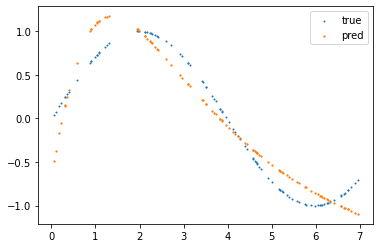

In [ ]:
# plotting true and predicted test data with tanh activation
plt.scatter(x_data_2,y_data_2,s=1,label='true')
plt.scatter(x_data_2,tanh_y_pred,s=1.5,label='pred')
plt.legend(loc='best')

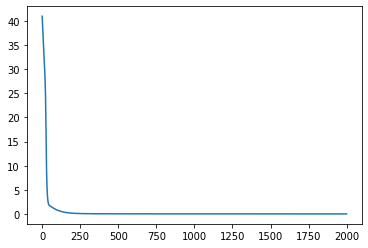

In [ ]:
# error vs no. of iterations
plt.plot(tanh_err_list)

### Using sigmoid activation function

In [ ]:
sig_nn_list=[1,70,1]

In [ ]:
sig_params,sig_err_list = model(X_train, Y_train,sig_nn_list, num_iters,10,1) 

Cost at iteration 1 = 341.4773301368511

Cost at iteration 2 = 980.0731361276187

Cost at iteration 3 = 2.7262820807421777

Cost at iteration 4 = 2.1489791635013424

Cost at iteration 5 = 1.713174989959123

Cost at iteration 6 = 1.3853865746077898

Cost at iteration 7 = 1.139953413371923

Cost at iteration 8 = 0.9572005309778376

Cost at iteration 9 = 0.8220458267672651

Cost at iteration 10 = 0.7229378312395485

Cost at iteration 11 = 0.6510416653638889

Cost at iteration 12 = 0.5996130027059028

Cost at iteration 13 = 0.5635154371734846

Cost at iteration 14 = 0.538847874851124

Cost at iteration 15 = 0.5226567237676214

Cost at iteration 16 = 0.5127136527966594

Cost at iteration 17 = 0.507344153037429

Cost at iteration 18 = 0.5052954942422925

Cost at iteration 19 = 0.5056352260636542

Cost at iteration 20 = 0.5076733395654465

Cost at iteration 21 = 0.5109027271639975

Cost at iteration 22 = 0.5149537652931305

Cost at iteration 23 = 0.5195597711613449

Cost at iteration 24 = 0.5

In [ ]:
sig_train_acc, sig_test_acc = compute_accuracy(X_train, X_test, Y_train, Y_test, sig_nn_list,sig_params,1)  #get training and test accuracy
print('Root Mean Squared Error on Training Data = ' + str(sig_train_acc))
print('Root Mean Squared Error on Test Data = ' + str(sig_test_acc))

Root Mean Squared Error on Training Data = 0.022073180316800962
Root Mean Squared Error on Test Data = 0.02683927592108116


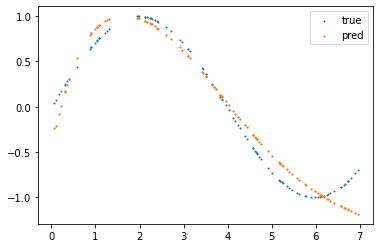

In [ ]:
# plotting true and predicted values with sigmoid activation
y_pred_sig=predict(x_data_2,sig_params,1)
plt.scatter(x_data_2,y_data_2,s=1,label='true')
plt.scatter(x_data_2,y_pred_sig,s=1.5,label='pred')
plt.legend(loc='best')

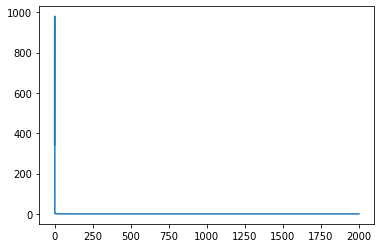

In [ ]:
# error vs iterations for sigmoid
plt.plot(sig_err_list)

### Using relu activation

In [ ]:
relu_nn_list=[1,20,1]

In [ ]:
relu_params,relu_err_list = model(X_train, Y_train,relu_nn_list, num_iters,0.1,3) 

Cost at iteration 1 = 326.4379630648143

Cost at iteration 2 = 148.43387563252517

Cost at iteration 3 = 82.94681245833988

Cost at iteration 4 = 49.91137114589977

Cost at iteration 5 = 31.284722202803394

Cost at iteration 6 = 20.288676321903367

Cost at iteration 7 = 13.428172453647125

Cost at iteration 8 = 9.011095310779742

Cost at iteration 9 = 6.123268612818592

Cost at iteration 10 = 4.220987404996277

Cost at iteration 11 = 2.9990539633973863

Cost at iteration 12 = 2.1741437278560327

Cost at iteration 13 = 1.6072905476696797

Cost at iteration 14 = 1.2161183476226527

Cost at iteration 15 = 0.9450864249851402

Cost at iteration 16 = 0.7564838474504133

Cost at iteration 17 = 0.6252756539289376

Cost at iteration 18 = 0.534234050943362

Cost at iteration 19 = 0.4720384799962453

Cost at iteration 20 = 0.4295584847979888

Cost at iteration 21 = 0.39878656517424366

Cost at iteration 22 = 0.376366940445827

Cost at iteration 23 = 0.36001239056921563

Cost at iteration 24 = 0.3

In [ ]:
relu_train_acc, relu_test_acc = compute_accuracy(X_train, X_test, Y_train, Y_test, relu_nn_list,relu_params,3)  #get training and test accuracy
print('Root Mean Squared Error on Training Data = ' + str(relu_train_acc))
print('Root Mean Squared Error on Test Data = ' + str(relu_test_acc))

Root Mean Squared Error on Training Data = 0.1908957418286072
Root Mean Squared Error on Test Data = 0.1251384735918371


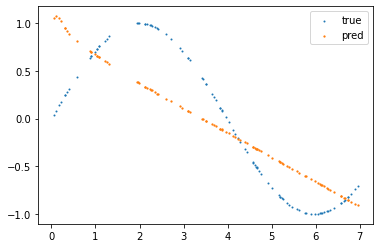

In [ ]:
# true vs pred for relu
y_pred_relu=predict(x_data_2,relu_params,3)
plt.scatter(x_data_2,y_data_2,s=1,label='true')
plt.scatter(x_data_2,y_pred_relu,s=1.5,label='pred')
plt.legend(loc='best')

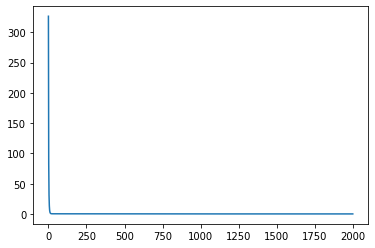

In [ ]:
# error vs iterations for relu
plt.plot(relu_err_list)

### Using Leaky Relu

In [ ]:
leaky_nn_list=[1,10,5,1]

In [ ]:
leakyrelu_params,leakyrelu_err_list = model(X_train, Y_train,leaky_nn_list, num_iters,0.3,4) 

Cost at iteration 1 = 814.5961192757263

Cost at iteration 2 = 0.22249528537270608

Cost at iteration 3 = 0.21369790347580564

Cost at iteration 4 = 0.20915404158824558

Cost at iteration 5 = 0.20663053073283122

Cost at iteration 6 = 0.20485945927513313

Cost at iteration 7 = 0.2035281565357081

Cost at iteration 8 = 0.2023491114828131

Cost at iteration 9 = 0.2012588847172183

Cost at iteration 10 = 0.2001992862404916

Cost at iteration 11 = 0.19915892930815648

Cost at iteration 12 = 0.19813144963380716

Cost at iteration 13 = 0.19711394023878112

Cost at iteration 14 = 0.1961046204871505

Cost at iteration 15 = 0.19510249564391027

Cost at iteration 16 = 0.19410700348577395

Cost at iteration 17 = 0.1931178197423243

Cost at iteration 18 = 0.19213540894070427

Cost at iteration 19 = 0.191160705828746

Cost at iteration 20 = 0.19019185698020435

Cost at iteration 21 = 0.1892287886897852

Cost at iteration 22 = 0.18827553087158588

Cost at iteration 23 = 0.1873344398339008

Cost at i

In [ ]:
leakyrelu_train_acc, leakyrelu_test_acc = compute_accuracy(X_train, X_test, Y_train, Y_test, nn_list,leakyrelu_params,4)  #get training and test accuracy
print('Root Mean Squared Error on Training Data = ' + str(leakyrelu_train_acc))
print('Root Mean Squared Error on Test Data = ' + str(leakyrelu_test_acc))

Root Mean Squared Error on Training Data = 0.07063172080767334
Root Mean Squared Error on Test Data = 0.0675457561581942


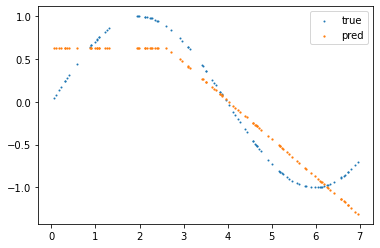

In [ ]:
# true vs predicted for leaky relu
y_pred_leakyrelu=predict(x_data_2,leakyrelu_params,4)
plt.scatter(x_data_2,y_data_2,s=1,label='true')
plt.scatter(x_data_2,y_pred_leakyrelu,s=1.5,label='pred')
plt.legend(loc='best')

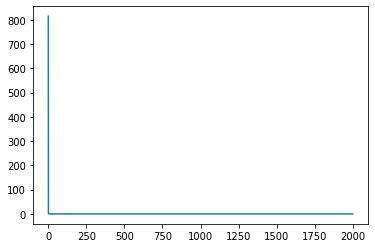

In [ ]:
# error vs iterations for leaky relu
plt.plot(leakyrelu_err_list)

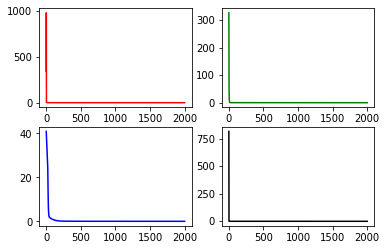

In [ ]:
# plotting for different activation functions
fig, ax = plt.subplots(2, 2)

ax[0, 0].plot(sig_err_list, 'r') #row=0, col=0
ax[1, 0].plot(tanh_err_list, 'b') #row=1, col=0
ax[0, 1].plot(relu_err_list, 'g') #row=0, col=1
ax[1, 1].plot(leakyrelu_err_list, 'k') #row=1, col=1
plt.show()

### Mse vs number of nodes

In [ ]:
# same earlier model but not printing cost at each iteration
def model_2(X_train, Y_train, layer_sizes, num_iters, learning_rate,act_no):
    params = initialize_params(layer_sizes)
    err_list=[]
    for i in range(num_iters):
        values = forward_propagation(X_train.T, params,act_no)
        cost = compute_cost(values, Y_train.T)
        grads = backward_propagation(params, values,X_train.T, Y_train.T,act_no)
        params = update_params(params, grads, learning_rate)
        err_list.append(cost)
        #print('Cost at iteration ' + str(i+1) + ' = ' + str(cost) + '\n')
    return params,err_list

In [ ]:
# function for plotting mean squared error vs number of nodes
# taking only one hidden layer
def mse_vs_nodes(act_no):
  error=[]
  nodes=[10,20,30,50,100]
  for x in nodes:
    l=[1,x,1]
    parameters,error_list=model_2(X_train, Y_train,l,2000,0.3,act_no)
    train_error, test_error = compute_accuracy(X_train, X_test, Y_train, Y_test,l,parameters,act_no)
    error.append(test_error)
  plt.plot(nodes,error)  
  


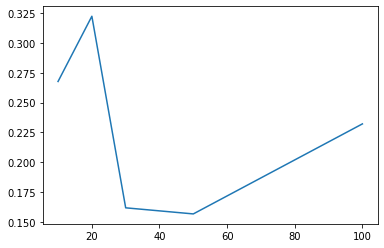

In [ ]:
# tanh
mse_vs_nodes(1)

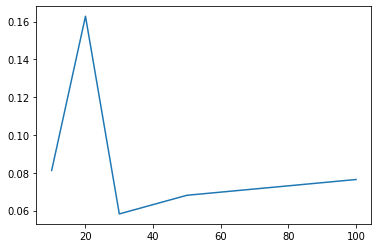

In [ ]:
# sigmoid
mse_vs_nodes(2)

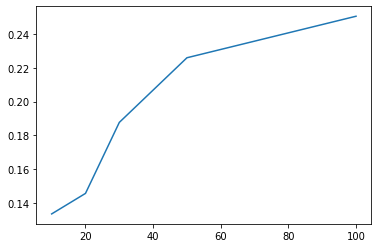

In [ ]:
# relu
mse_vs_nodes(3)

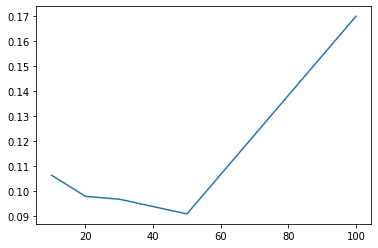

In [ ]:
# leaky relu
mse_vs_nodes(4)

### Polynomial Regression code (from prev assign)

In [ ]:
# Function for creating basis function
# returns the features after applying basis function
# Taking polynomial as basis function
def create_features(X, degree, standardize):
    
    if len(X.shape) == 1:
        X = X.unsqueeze(1)
    # Adding bias of 0.02 to input data
    bias_col=np.full((X.shape[0], 1), 0.02, dtype=float)
    bias_col=torch.tensor(bias_col)

    
    X_d = torch.cat([bias_col, X], axis=1)
    for i in range(1, degree):
        X_pow = X.pow(i + 1)
        # If we are using the gradient descent method, we need to
        # standardize the features to avoid exploding gradients
        if standardize:
            X_pow -= X_pow.mean()
            std = X_pow.std()
            if std != 0:
                X_pow /= std
        X_d = torch.cat([X_d, X_pow], axis=1)
    return X_d

def predict_regr(features, weights):
    return features.mm(weights)

# Function for closed form solution or using normal equation
def normal_equation(y_true, X):
    
    XTX_inv = (X.T.mm(X)).inverse()
    XTy = X.T.mm(y_true)
    weights = XTX_inv.mm(XTy)
    return weights

In [ ]:
len(Y_train)

80

### mse vs number of unknown parameters

In [ ]:
# function for plotting mean squared error vs number of parameters for comparing nn and polynomial regression
def mse_vs_para():
  error_1=[]
  error_2=[]
  para_1=[]
  para_2=[]
  error_reg=[]
  para_reg=[]
  for x in range(1,11):
    l1=[1,x,1]
    l2=[1,x,x,1]
    p1=3*x+1
    p2=x**2 + 4*x + 1
    parameters,error_list=model_2(X_train, Y_train,l1,2000,10,1)
    train_error, test_error = compute_accuracy(X_train, X_test, Y_train, Y_test,l1,parameters,1)
    error_1.append(test_error)
    para_1.append(p1)
    parameters,error_list=model_2(X_train, Y_train,l2,2000,10,1)
    train_error, test_error = compute_accuracy(X_train, X_test, Y_train, Y_test,l2,parameters,1)
    error_2.append(test_error)
    para_2.append(p2)
    features = create_features(torch.tensor(X_train), degree=x, standardize=False)
    weights = normal_equation(torch.tensor(Y_train).unsqueeze(1), features)
    y_pred_reg = predict_regr(features, weights)
    err_reg=mean_squared_error(Y_train,y_pred_reg)
    error_reg.append(err_reg)
    para_reg.append(x+1)

  plt.plot(para_1,error_1,'g',label="nn_1")
  plt.plot(para_2,error_2,'r',label="nn_2")
  plt.plot(para_reg,error_reg,'b',label="poly_reg")
  plt.legend(loc="best")



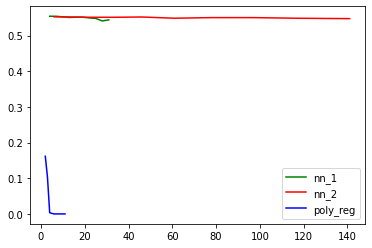

In [ ]:
# mse vs number of parameters
# green for nn with 1 hidden layer
# red for nn with 2 hidden layers
# blue for polynomial regression
import torch
mse_vs_para()

## NN using keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(50, input_dim=1, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='linear'))

In [ ]:
model.compile(loss='mse', optimizer='sgd', metrics=['mae'])

In [ ]:
history=model.fit(x_data_2,y_data_2, epochs=200, batch_size=100)

Epoch 1/200
1/1 [==============================] - 0s 1ms/step - loss: 0.0888 - mae: 0.2565
Epoch 2/200
1/1 [==============================] - 0s 940us/step - loss: 0.0882 - mae: 0.2542
Epoch 3/200
1/1 [==============================] - 0s 3ms/step - loss: 0.0880 - mae: 0.2542
Epoch 4/200
1/1 [==============================] - 0s 2ms/step - loss: 0.0877 - mae: 0.2538
Epoch 5/200
1/1 [==============================] - 0s 2ms/step - loss: 0.0875 - mae: 0.2535
Epoch 6/200
1/1 [==============================] - 0s 2ms/step - loss: 0.0872 - mae: 0.2531
Epoch 7/200
1/1 [==============================] - 0s 1ms/step - loss: 0.0869 - mae: 0.2528
Epoch 8/200
1/1 [==============================] - 0s 1ms/step - loss: 0.0867 - mae: 0.2525
Epoch 9/200
1/1 [==============================] - 0s 2ms/step - loss: 0.0864 - mae: 0.2522
Epoch 10/200
1/1 [==============================] - 0s 2ms/step - loss: 0.0862 - mae: 0.2518
Epoch 11/200
1/1 [==============================] - 0s 2ms/step - loss: 0.085

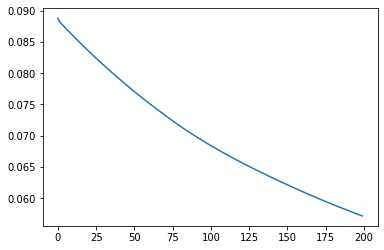

In [ ]:
# plotting loss
plt.plot(history.history['loss']) 

In [ ]:
y_pred_keras = model.predict(x_data_2)

In [ ]:
y_pred_keras

array([[-0.19648117],
       [-0.5201233 ],
       [-0.7497626 ],
       [-0.10664117],
       [-0.6383695 ],
       [ 0.6723948 ],
       [-0.8580052 ],
       [ 0.7308948 ],
       [ 0.20513344],
       [-0.91240865],
       [ 0.11350465],
       [-1.0948915 ],
       [ 0.50697416],
       [ 0.6276621 ],
       [-1.2089407 ],
       [ 0.555845  ],
       [ 0.73324895],
       [-1.1179307 ],
       [ 0.76851153],
       [-0.75583464],
       [ 0.5807425 ],
       [ 0.77139217],
       [ 0.60890555],
       [-0.53430486],
       [ 0.61908734],
       [-0.3075838 ],
       [ 0.7507717 ],
       [ 0.082084  ],
       [ 0.7111593 ],
       [ 0.7429747 ],
       [ 0.58966005],
       [-0.613113  ],
       [ 0.7615578 ],
       [ 0.7382726 ],
       [-0.94740385],
       [-0.9703557 ],
       [-0.89398736],
       [ 0.7308404 ],
       [-0.8913415 ],
       [-0.41814566],
       [ 0.34359413],
       [ 0.17273921],
       [-0.31148297],
       [-1.0844266 ],
       [-0.5330297 ],
       [ 0

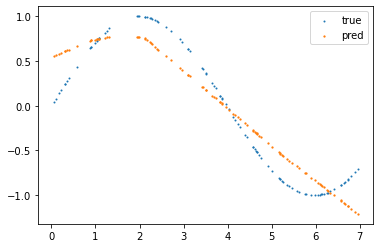

In [ ]:
# plotting true and predicted values
plt.scatter(x_data_2,y_data_2,s=1,label="true")
plt.scatter(x_data_2,y_pred_keras,s=1.5,label="pred")
plt.legend(loc='best')

#(2) Electro-statically actuated switch classification problem

In [ ]:
# defining and initializing variables
udf_coeff=0.1
l=0.2
h=0.01
w=0.01
g=0.05
E=10e6

In [ ]:
print(E)

10000000.0


In [ ]:
6*g

0.30000000000000004

In [ ]:
I=w*(h**3)/12

In [ ]:
# generate data for force
Force = np.array([])
while True: 
    Force = np.append(Force, random.uniform(0,3))
    if len(Force) >= 10e3: 
      break


In [ ]:
# generate data for voltage
Voltage=np.array([])
while True:
  Voltage=np.append(Voltage,random.uniform(0,3))
  if len(Voltage) >=10e3:
    break

In [ ]:
# Calculating max deflection
max_deflec= (Force*(l**3))/(3*E*I) + (udf_coeff*np.square(Voltage)*(l**4))/8*E*I

In [ ]:
# list for whether design is suitable or not
design=[1 if x < 6*g and x > g else 0 for x in max_deflec]

In [ ]:
design=np.array(design)

In [ ]:
x_values=zip(Force,Voltage)

In [ ]:
x_values=np.array(list(x_values))

In [ ]:
print(x_values)

[[1.0768713  0.43571854]
 [1.53144709 1.62871773]
 [2.9770479  2.04250109]
 ...
 [2.87041439 1.19495679]
 [0.14362153 1.60744718]
 [0.74626021 2.29155892]]


In [ ]:
from sklearn.model_selection import train_test_split
X_train_2,X_test_2,y_train_2,y_test_2 = train_test_split(x_values,design,test_size = 0.3)

In [ ]:
len(y_test_2)

3000

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, input_dim=2, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history=model.fit(X_train_2,y_train_2, epochs=200, batch_size=100)

Epoch 1/200
70/70 [==============================] - 0s 1ms/step - loss: 0.4450 - accuracy: 0.7387
Epoch 2/200
70/70 [==============================] - 0s 1ms/step - loss: 0.2702 - accuracy: 0.8734
Epoch 3/200
70/70 [==============================] - 0s 1ms/step - loss: 0.1813 - accuracy: 0.9266
Epoch 4/200
70/70 [==============================] - 0s 1ms/step - loss: 0.1217 - accuracy: 0.9509
Epoch 5/200
70/70 [==============================] - 0s 1ms/step - loss: 0.0822 - accuracy: 0.9784
Epoch 6/200
70/70 [==============================] - 0s 1ms/step - loss: 0.0615 - accuracy: 0.9866
Epoch 7/200
70/70 [==============================] - 0s 1ms/step - loss: 0.0493 - accuracy: 0.9887
Epoch 8/200
70/70 [==============================] - 0s 1ms/step - loss: 0.0411 - accuracy: 0.9914
Epoch 9/200
70/70 [==============================] - 0s 1ms/step - loss: 0.0355 - accuracy: 0.9931
Epoch 10/200
70/70 [==============================] - 0s 1ms/step - loss: 0.0333 - accuracy: 0.9920
Epoch 11/

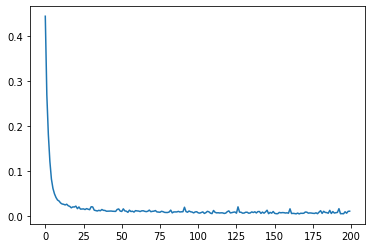

In [ ]:
# plotting loss 
plt.plot(history.history['loss']) 

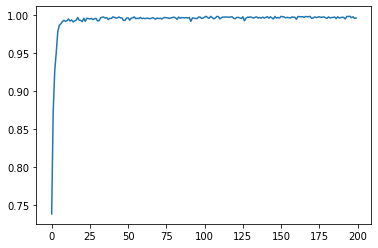

In [ ]:
# plotting accuracy
plt.plot(history.history['accuracy'])

In [ ]:
# predicting test data
y_pred_2 = model.predict(X_test_2)

In [ ]:
# calculating accuracy
from sklearn.metrics import accuracy_score
_, a = model.evaluate(X_test_2, y_test_2, verbose=0)
print('Accuracy is:', a*100)

Accuracy is: 99.59999918937683


In [ ]:
# checking actual and predicted values for 5 examples
predictions = (model.predict(X_test_2) > 0.5).astype("int32")
#prediction=model.predict_classes(X_test_2)
#print(predictions)
for i in range(5):
	print('%s => %d (expected %d)' % (X_test_2[i].tolist(), predictions[i], y_test_2[i]))

[0.858841998345147, 0.2509651806376543] => 1 (expected 1)
[0.4040566839646452, 1.7687202519388237] => 1 (expected 1)
[2.0181633832246004, 2.641884466059537] => 0 (expected 0)
[1.8727936695020122, 2.3321921483487857] => 0 (expected 0)
[0.9277934305404487, 1.952620091550068] => 0 (expected 1)
